Guess:      [74.1, -39.54900002125354, 149.98623931249693]
Parameters: [ 74.98866593  63.65460008 100.97054309]


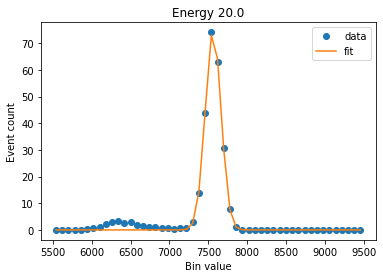

Guess:      [39.8, 38.91019701264437, 89.59742267334042]
Parameters: [ 40.81330018  97.62410435 123.45190436]


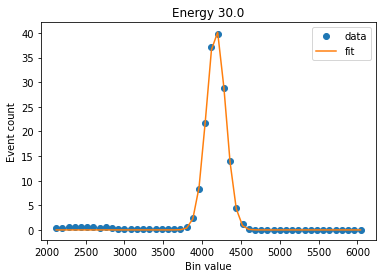

Guess:      [485.0, 159.48253518805663, 1228.6402388722422]
Parameters: [496.38966924 166.25371829 161.79579425]


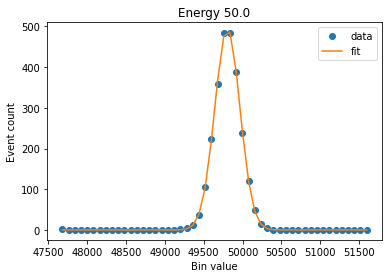

Guess:      [378.0, 315.2678549670487, 1082.19767701821]
Parameters: [378.77463285 319.66460915 232.75294523]


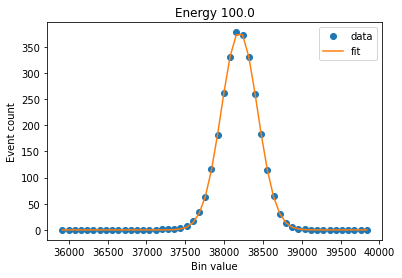

Guess:      [273.0, 412.7983599533932, 838.9242610308991]
Parameters: [271.20522394 418.96718105 292.4064621 ]


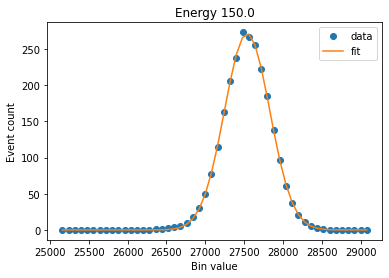

Guess:      [142.0, 393.49601209837755, 459.17833123013804]
Parameters: [141.87028409 403.14735839 340.53767655]


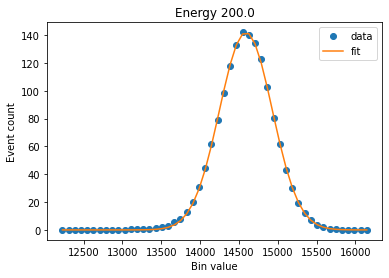

Guess:      [55.6, 186.3116171958772, 183.90626182278066]
Parameters: [ 54.89037768 200.34526985 389.04249458]


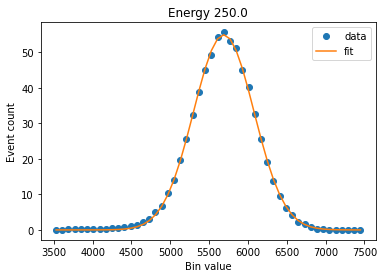

Guess:      [0.0, 0, 0.0]
Parameters: [0. 0. 0.]


C:\Users\Thomas Vadnais\AppData\Local\Temp\ipykernel_14300\950240913.py:7: RuntimeWarning: divide by zero encountered in true_divide
  return A*np.exp(-1*(x-B)**2/(2*C**2))
c:\users\thomas vadnais\appdata\local\programs\python\python38\lib\site-packages\scipy\optimize\_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


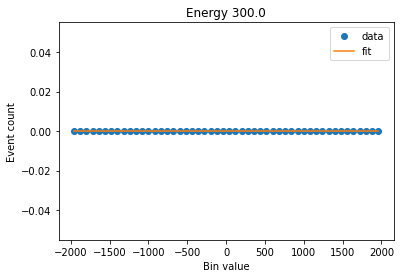

Energy Parameters[21.73662423  0.16743398]


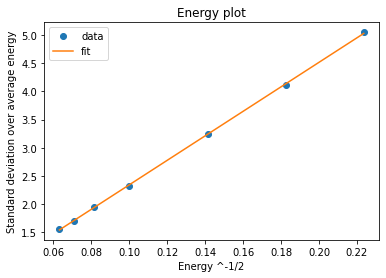

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

def Gauss(x, A, B, C):
    return A*np.exp(-1*(x-B)**2/(2*C**2))

def line(x, A, B):
    return A*x + B
    
#read data from CSV
data = pd.read_csv('Energies_mc.csv') #Change FILEPATH
row_size, col_size = data.shape
xdata = np.asarray(list(data.columns[1:]), dtype=np.float64)

#Fit a gaussian to each data set
parameters=[]
for row in range(row_size):
    ydata = np.asarray(list(data.iloc[row][1:]), dtype=np.float64)
    if sum(ydata) !=0:
        avg = np.average(xdata,weights=ydata)
    else:
        avg = 0
    guess = [max(ydata),
             avg,
             np.sqrt(np.var(ydata))*10] # the 10 padding reduces undershoots. Only rounds down anyway
    print('Guess:      ' + str(guess))
    param, paramconv = curve_fit(Gauss, xdata, ydata, p0=guess)
    param[2] = abs(param[2])
    print('Parameters: ' + str(param))
    parameters.append(param)
    fit_y = Gauss(xdata, param[0], param[1], param[2])
    
    plt.figure(yrow)
    plt.plot(xdata+100*param[0], ydata, 'o', label='data') #Is the shift constant or dependent on energy?
    plt.plot(xdata+100*param[0], fit_y, '-', label='fit')
    plt.legend()
    #plt.axis([-2000,2000,-10,380])
    plt.xlabel('Bin value')
    plt.ylabel('Event count')
    plt.title('Energy ' + str(data.loc[row][0]))
    plt.show() 
    
#Create cumulative dataset
Energy_x = []
Energy_y = []
output_data = []
for num in range(row):
    Energy_x.append(1 / np.sqrt(data.iloc[num][0])) #Gets 1/sqrt(E)
    Energy_y.append(parameters[num][2]/ data.iloc[num][0])
    output_data.append([Energy_x[num],Energy_y[num]])
    
#Create the guess
slope = (Energy_y[row-1] - Energy_y[0]) / (Energy_x[row-1] - Energy_x[0])
intercept = Energy_y[0] - slope*Energy_x[0]
Energy_guess = [slope,intercept]
#print(Energy_guess)

#format to work with float64 type
Energy_xdata = np.asarray(Energy_x)
Energy_ydata = np.asarray(Energy_y)

#create the fit
Enegparam, Enegcov = curve_fit(line, Energy_xdata, Energy_ydata, p0 = Energy_guess)
print('Energy Parameters' + str(Enegparam))
linfit = line(Energy_xdata, Enegparam[0], Enegparam[1])

#plot the data and fit, Parameters may not be in correct units...
plt.figure(8)
plt.plot(Energy_x,Energy_y, 'o', label='data')
plt.plot(Energy_xdata,linfit, '-', label='fit')
plt.legend()
plt.xlabel('Energy ^-1/2')
plt.ylabel('Standard deviation over average energy')
plt.title('Energy plot')
plt.show()

#Create the csv result file
output_dataframe = pd.DataFrame(output_data, columns = ['Energy^-1/2','StdDev/Energy'])
output_dataframe.to_csv('Energies_mc_processed.csv') #Change FILEPATH


